### Predict whether a claim will be approved or denied  ###

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
claims = pd.read_csv('Data/dim_claims.csv')
dates = pd.read_csv('Data/dim_date.csv')
pa = pd.read_csv('Data/dim_pa.csv')
bridge = pd.read_csv('Data/bridge.csv')

**Table features:**

- **Claims Table**

In [3]:
for column in claims.columns:
    print(column)

dim_claim_id
bin
drug
reject_code
pharmacy_claim_approved


- **PA Table**

In [4]:
for column in pa.columns:
    print(column)

dim_pa_id
correct_diagnosis
tried_and_failed
contraindication
pa_approved


- **Dates**

In [5]:
for column in dates.columns:
    print(column)

dim_date_id
date_val
calendar_year
calendar_month
calendar_day
day_of_week
is_weekday
is_workday
is_holiday


**Data merge and exploration**

In [6]:
data = claims.merge(bridge, on='dim_claim_id')
data = data.merge(dates, on='dim_date_id')

- **Percentage of claims approved**

Claims approved: 58.37%

In [7]:
data.pharmacy_claim_approved.value_counts(normalize=True)

1    0.583737
0    0.416263
Name: pharmacy_claim_approved, dtype: float64

- **Claims status by drug**

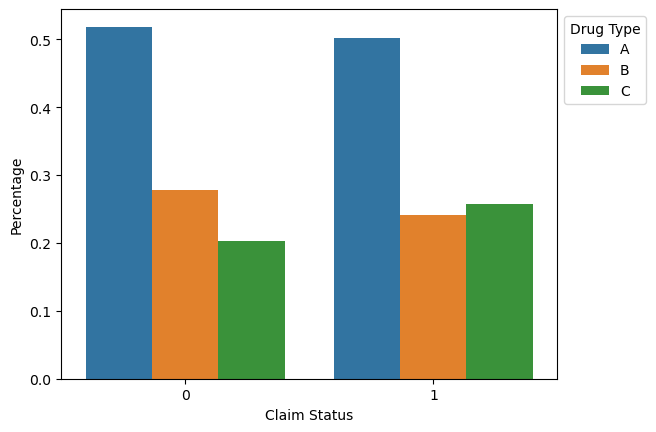

In [8]:
group = data.groupby(['pharmacy_claim_approved']).drug.value_counts(normalize=True).reset_index(name='Count')
plot = sns.barplot(x='pharmacy_claim_approved', y='Count', data=group, hue='drug')
plot.legend(title='Drug Type', bbox_to_anchor=(1,1), loc='upper left')
plot.set(xlabel='Claim Status', ylabel='Percentage')
plt.show()

- **Claim status by Payer Bin**

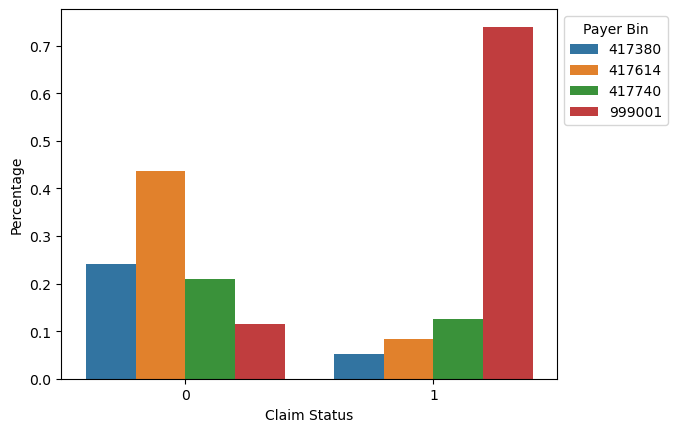

In [9]:
group1 = data.groupby(['pharmacy_claim_approved']).bin.value_counts(normalize=True).reset_index(name='Count')
plot = sns.barplot(x='pharmacy_claim_approved', y='Count', data=group1, hue='bin')
plot.legend(title='Payer Bin', bbox_to_anchor=(1,1), loc='upper left')
plot.set(xlabel='Claim Status', ylabel='Percentage')
plt.show()

- **Claim rejected by code**

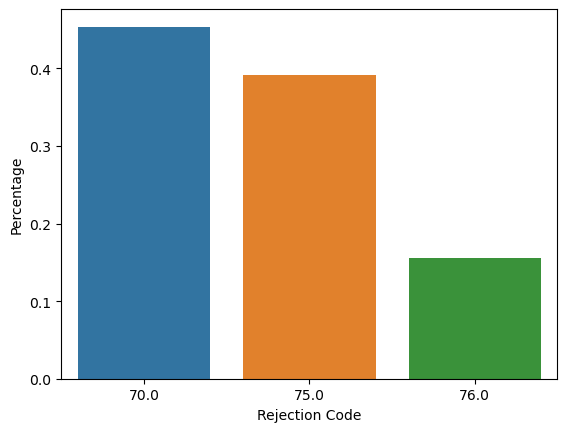

In [10]:
plot = sns.barplot(x=data.reject_code.value_counts(normalize=True).index, 
            y=data.reject_code.value_counts(normalize=True))
plot.set(xlabel='Rejection Code', ylabel='Percentage')
plt.show()

- **Claim status through time**

In [25]:
group2 = data.groupby(['date_val']).pharmacy_claim_approved.value_counts().reset_index(name='Count')
group2.head()

,date_val,pharmacy_claim_approved,Count
0,2017-01-01,1,129
1,2017-01-01,0,94
2,2017-01-02,1,640
3,2017-01-02,0,437
4,2017-01-03,1,825


In [26]:
group2['date_val']=pd.to_datetime(group2['date_val'].astype(str), format='%Y/%m/%d')
group2 = group2.set_index('date_val')
rejected = group2[group2['pharmacy_claim_approved']==0]
rejected = rejected.drop(columns=['pharmacy_claim_approved'])
approved = group2[group2['pharmacy_claim_approved']==1]
approved = approved.drop(columns=['pharmacy_claim_approved'])

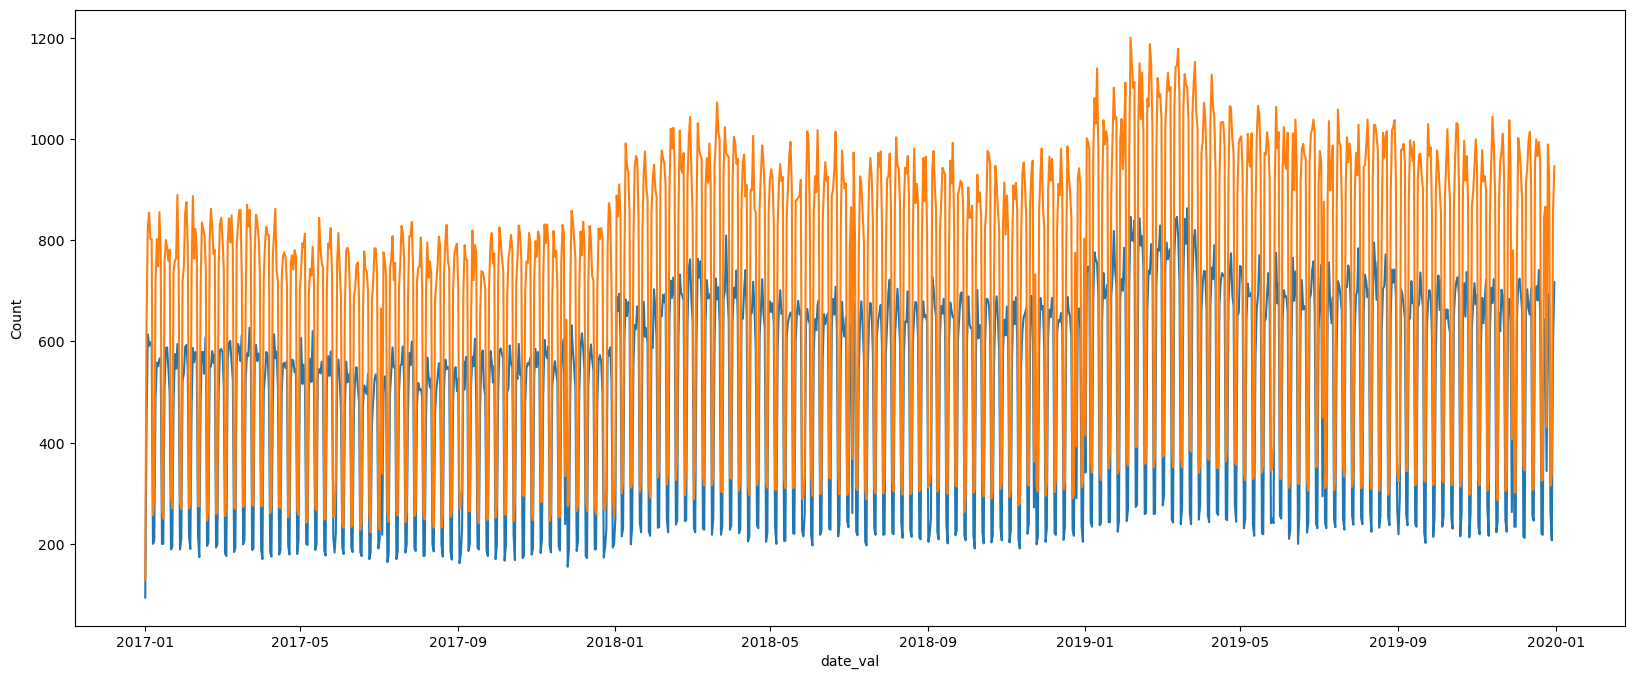

In [125]:
plt.figure(figsize=(20,8))
sns.lineplot(x=rejected.index, y='Count', data=rejected)
sns.lineplot(x=approved.index, y='Count', data=approved)
plt.show()
